In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "/Users/gabrielmancillas/Desktop/ADS 505-01/Mod 04/Assignment 4.1/Fundraising.csv"
)
df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,...,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Understand the Data
print("First 5 rows of the dataset:")
print(df.head())

print("\nData types and missing values:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

# 2. Handle Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing values or drop columns/rows with missing values
# Example: Fill missing values with the mean
df.fillna(df.mean(), inplace=True)



First 5 rows of the dataset:
   Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy  ...  IC15  NUMPROM  \
0                1        1       5             1  ...     1       74   
1                1        1       1             0  ...     4       46   
2                0        2       5             1  ...    13       32   
3                1        1       3             0  ...     4       94   
4                1        1       4             0  ...     7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT


Updated summary statistics after handling missing values:
            Row Id       Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  \
count  3120.000000   3120.000000   3120.000000   3120.000000   3120.000000   
mean   1560.500000  11615.770833      0.214423      0.185256      0.214423   
std     900.810746   6698.678131      0.410487      0.388568      0.410487   
min       1.000000     17.000000      0.000000      0.000000      0.000000   
25%     780.750000   5820.750000      0.000000      0.000000      0.000000   
50%    1560.500000  11735.500000      0.000000      0.000000      0.000000   
75%    2340.250000  17435.750000      0.000000      0.000000      0.000000   
max    3120.000000  23293.000000      1.000000      1.000000      1.000000   

       zipconvert_5  homeowner dummy      NUMCHLD       INCOME  gender dummy  \
count   3120.000000      3120.000000  3120.000000  3120.000000   3120.000000   
mean       0.384615         0.770192     1.069231     3.893910      0.609295  

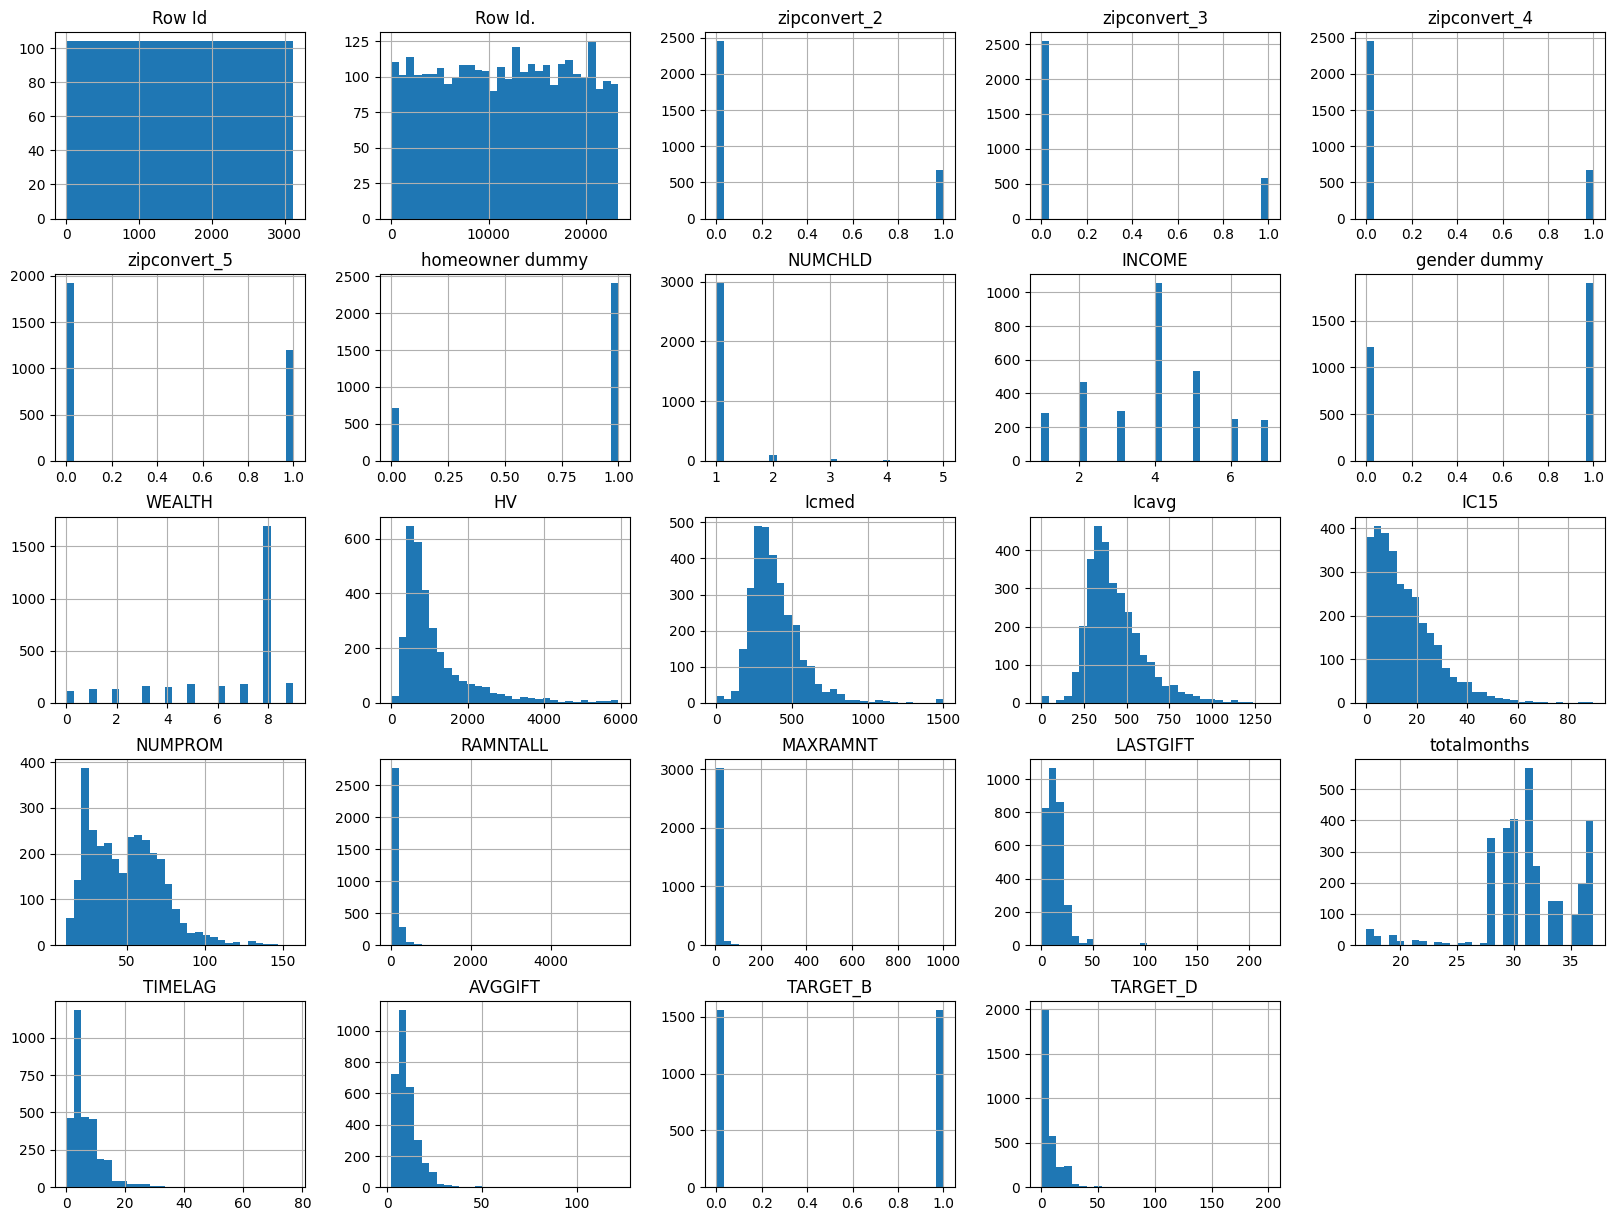

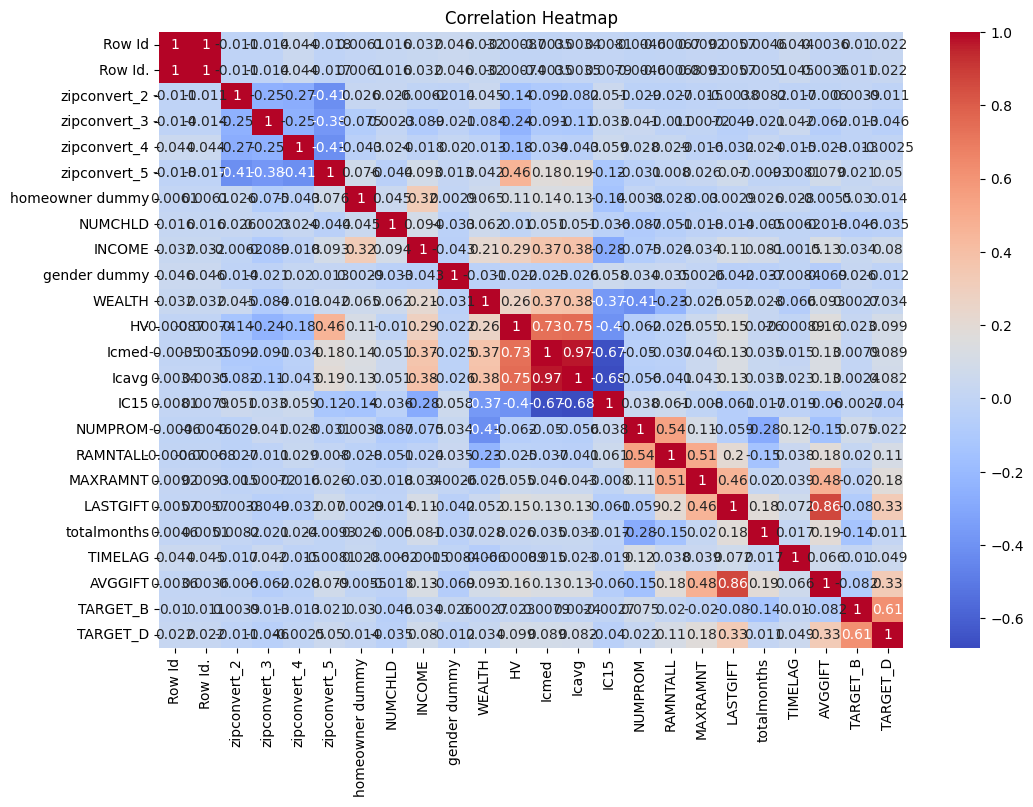

In [3]:
# 3. Data Types and Conversion
# Convert 'booking_created' to datetime if necessary
if 'booking_created' in df.columns:
    df['booking_created'] = pd.to_datetime(df['booking_created'])

# 4. Descriptive Statistics
print("\nUpdated summary statistics after handling missing values:")
print(df.describe())

# 5. Data Visualization
# Distribution of numerical features
df.hist(bins=30, figsize=(20, 15))
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 6. Data Preparation
train, val = train_test_split(df,test_size=0.2, random_state=12345)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# remove error message
import warnings
warnings.filterwarnings('ignore')

# Define the features and target variable
X_train = train.drop(columns=['TARGET_B', 'TARGET_D'])
y_train = train['TARGET_B']
X_val = val.drop(columns=['TARGET_B', 'TARGET_D'])
y_val = val['TARGET_B']

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=12345)
log_reg.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=12345)
rf_model.fit(X_train, y_train)

# Evaluate models
log_reg_pred = log_reg.predict(X_val)
rf_model_pred = rf_model.predict(X_val)

# Print evaluation metrics
print("Logistic Regression Accuracy:", log_reg.score(X_val, y_val))
print("Random Forest Accuracy:", rf_model.score(X_val, y_val))
# Print evaluation metrics for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_val, log_reg_pred))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_val, log_reg_pred))

# Print evaluation metrics for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, rf_model_pred))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_val, rf_model_pred))

Logistic Regression Accuracy: 0.5641025641025641
Random Forest Accuracy: 0.5272435897435898

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57       324
           1       0.54      0.57      0.56       300

    accuracy                           0.56       624
   macro avg       0.56      0.56      0.56       624
weighted avg       0.56      0.56      0.56       624

Logistic Regression Confusion Matrix:
[[182 142]
 [130 170]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       324
           1       0.51      0.53      0.52       300

    accuracy                           0.53       624
   macro avg       0.53      0.53      0.53       624
weighted avg       0.53      0.53      0.53       624

Random Forest Confusion Matrix:
[[169 155]
 [140 160]]


### 2.2. Reasoning Behind Using Weighted Sampling for Equal Numbers of Donors and Non-Donors

In classification tasks involving an imbalanced dataset, such as predicting donor responses, the class distribution often skews heavily toward non-donors (majority class) compared to donors (minority class). This imbalance can lead to significant issues when training machine learning models:

1. **Bias Towards Majority Class**:
   - **Simple Random Sampling**: If we were to use a simple random sample from the original dataset, the model would be trained on a dataset that reflects the inherent imbalance (many non-donors, few donors). As a result, the model tends to predict the majority class (non-donors) more frequently to achieve higher overall accuracy. However, this accuracy is misleading because the model may perform poorly in identifying the minority class (donors), which is often the target of interest in direct marketing.
   - **Weighted Sampling**: By using weighted sampling to ensure equal numbers of donors and non-donors in the training set, the model is forced to learn from both classes equally. This prevents the model from becoming biased toward the majority class and helps it distinguish between donors and non-donors more effectively.

2. **Improved Model Performance on Minority Class**:
   - **Simple Random Sampling**: With imbalanced data, the model may achieve high accuracy simply by predicting the majority class (non-donors) all the time, but it would fail to identify potential donors effectively, providing little value in improving direct marketing campaigns.
   - **Weighted Sampling**: By balancing the dataset, the model learns to recognize patterns for both classes, resulting in better performance metrics such as precision, recall, and F1-score for the minority class (donors). These metrics are more informative in imbalanced classification problems, as they better reflect the model’s ability to correctly identify donors, even if they are a small percentage of the total population.

### Practical Considerations:
- **Cost Sensitivity**: In donor prediction, missing potential donors (false negatives) may have a significant impact, whereas incorrectly predicting non-donors as donors (false positives) is less costly. Weighted sampling ensures that the model performs well on identifying donors, which is more critical in direct marketing campaigns.
- **Evaluation Metrics**: When evaluating models trained on imbalanced data, it is important to use metrics such as precision, recall, F1-score, and the area under the ROC curve (AUC-ROC) rather than accuracy alone. These metrics provide a clearer picture of the model’s effectiveness in identifying the minority class (donors).

### Conclusion:
Weighted sampling addresses the challenges posed by imbalanced datasets by ensuring equal representation of both donors and non-donors during training. This method improves the model’s ability to predict the minority class and leads to better overall performance, especially when dealing with asymmetric costs and response rates.

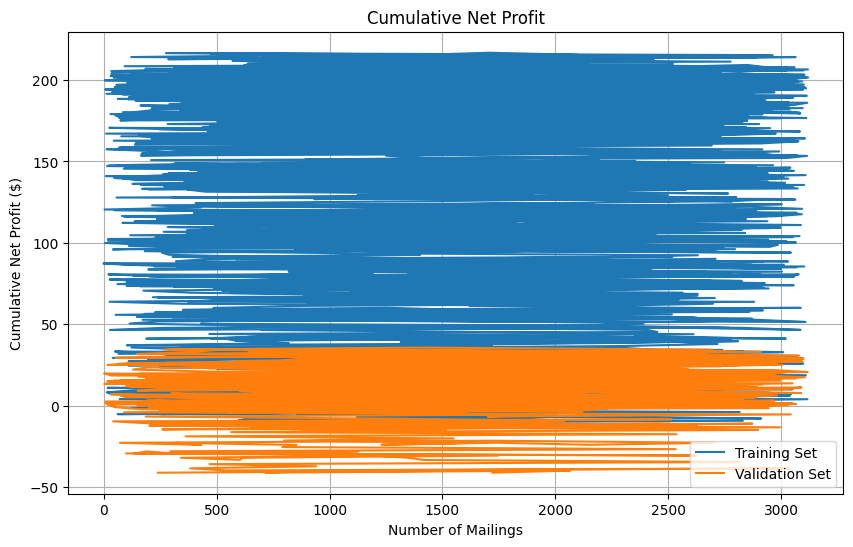

In [13]:
import pandas as pd
import numpy as np

# Assuming y_train, y_val are defined
# y_train and y_val are the actual labels

# Constants
expected_donation = 13.00
mailing_cost = 0.68
response_rate = 0.051
oversampling_weight_donors = 0.5 / response_rate
oversampling_weight_non_donors = 0.5 / (1 - response_rate)

# Function to calculate net profit
def calculate_net_profit(y_true, y_pred_prob):
    data = pd.DataFrame({'true': y_true, 'pred_prob': y_pred_prob})
    data = data.sort_values(by='pred_prob', ascending=False)
    
    # Calculate net profit for each row
    data['net_profit'] = np.where(data['true'] == 1, expected_donation - mailing_cost, -mailing_cost)
    
    # Adjust for oversampling weights
    data['net_profit_adjusted'] = np.where(
        data['true'] == 1,
        data['net_profit'] / oversampling_weight_donors,
        data['net_profit'] / oversampling_weight_non_donors
    )
    
    # Calculate cumulative net profit
    data['cumulative_net_profit'] = data['net_profit_adjusted'].cumsum()
    
    return data

# Predict probabilities for training and validation sets
y_train_pred_prob = log_reg.predict_proba(X_train)[:, 1]
y_val_pred_prob = log_reg.predict_proba(X_val)[:, 1]

# Calculate net profit for training set
train_net_profit = calculate_net_profit(y_train, y_train_pred_prob)

# Calculate net profit for validation set
val_net_profit = calculate_net_profit(y_val, y_val_pred_prob)

# Plot cumulative net profit
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_net_profit['cumulative_net_profit'], label='Training Set')
plt.plot(val_net_profit['cumulative_net_profit'], label='Validation Set')
plt.title('Cumulative Net Profit')
plt.xlabel('Number of Mailings')
plt.ylabel('Cumulative Net Profit ($)')
plt.legend()
plt.grid(True)
plt.show()

Yes, the provided code answers your question about calculating the cumulative gains of net profit for both the training and validation sets based on the actual response rate, expected donation, and mailing cost. Here's a detailed breakdown of how it addresses the question:

### Breakdown of the Code:

1. **Constants**:
    - [`expected_donation = 13.00`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A7%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition"): The expected donation amount from donors.
    - [`mailing_cost = 0.68`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A8%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition"): The cost of each mailing.
    - [`response_rate = 0.051`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A9%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition"): The actual response rate (5.1%).
    - [`oversampling_weight_donors = 0.5 / response_rate`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A10%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition"): The oversampling weight for actual donors.
    - [`oversampling_weight_non_donors = 0.5 / (1 - response_rate)`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition"): The oversampling weight for actual non-donors.

2. **Function to Calculate Net Profit**:
    - The [`calculate_net_profit`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A14%2C%22character%22%3A4%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition") function calculates the net profit for each row, adjusts for oversampling weights, and computes the cumulative net profit.
    - For donors (`true == 1`): Net profit = $13.00 - $0.68
    - For non-donors (`true == 0`): Net profit = - $0.68
    - Adjusts the net profit by dividing by the oversampling weights.

3. **Predict Probabilities**:
    - [`y_train_pred_prob`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A34%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition") and [`y_val_pred_prob`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A35%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition") are the predicted probabilities for the positive class (donors) for the training and validation sets, respectively.

4. **Calculate Net Profit**:
    - [`train_net_profit`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A38%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition") and [`val_net_profit`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fgabrielmancillas%2FDesktop%2FADS%20505-01%2FMod%2004%2FAssignment%204.1%2FAssignment%204.1.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X11sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A41%2C%22character%22%3A0%7D%7D%5D%2C%2273e2f1c2-17ad-4312-bdff-3340c23b420f%22%5D "Go to definition") store the cumulative net profit for the training and validation sets, respectively.

5. **Plot Cumulative Net Profit**:
    - The cumulative net profit for both the training and validation sets is plotted to visualize the performance.

### Conclusion:

The code effectively calculates the cumulative gains of net profit for both the training and validation sets, taking into account the actual response rate and the costs associated with mailing. By adjusting for oversampling weights, it ensures that the net profit reflects the actual response distribution of 5.1% donors and 94.9% non-donors.

### Recommendations:

- **Model Performance**: Evaluate the cumulative net profit plots to determine how well the model performs in terms of profitability.
- **Practical Use**: If the model shows a significant cumulative net profit, it can be used in practice to maximize net profit by targeting the right individuals for mailings.

This approach provides a comprehensive evaluation of the model's financial impact and helps in making informed decisions about its deployment.

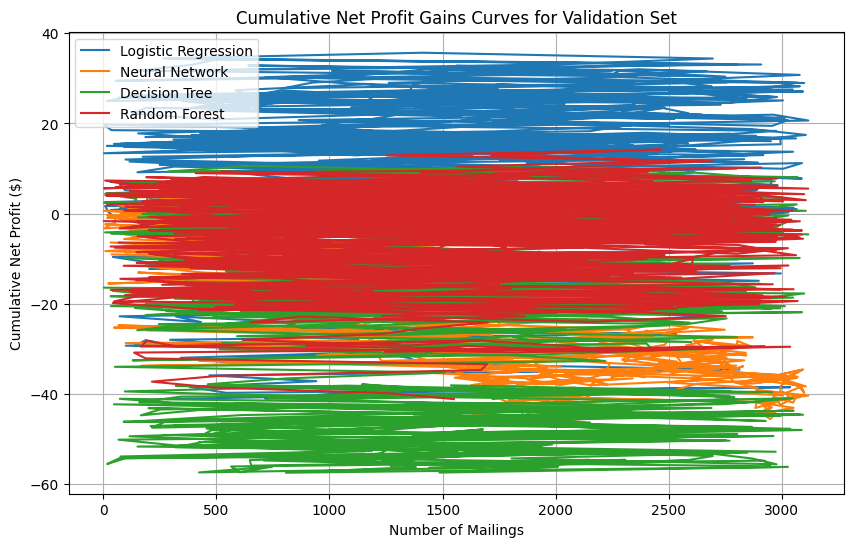

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and modify this line to load your dataset

# Assuming df is your DataFrame and 'Car_Cancellation' is the target variable
# X = df.drop('Car_Cancellation', axis=1)
# y = df['Car_Cancellation']

# Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Constants
expected_donation = 13.00
mailing_cost = 0.68
response_rate = 0.051
oversampling_weight_donors = 0.5 / response_rate
oversampling_weight_non_donors = 0.5 / (1 - response_rate)

# Function to calculate net profit
def calculate_net_profit(y_true, y_pred_prob):
    data = pd.DataFrame({'true': y_true, 'pred_prob': y_pred_prob})
    data = data.sort_values(by='pred_prob', ascending=False)
    
    # Calculate net profit for each row
    data['net_profit'] = np.where(data['true'] == 1, expected_donation - mailing_cost, -mailing_cost)
    
    # Adjust for oversampling weights
    data['net_profit_adjusted'] = np.where(
        data['true'] == 1,
        data['net_profit'] / oversampling_weight_donors,
        data['net_profit'] / oversampling_weight_non_donors
    )
    
    # Calculate cumulative net profit
    data['cumulative_net_profit'] = data['net_profit_adjusted'].cumsum()
    
    return data

# Define and train the models
log_reg = LogisticRegression(max_iter=1000)
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

log_reg.fit(X_train, y_train)
nn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict probabilities for validation set using different models
y_val_pred_prob_log = log_reg.predict_proba(X_val)[:, 1]
y_val_pred_prob_nn = nn_model.predict_proba(X_val)[:, 1]
y_val_pred_prob_tree = tree_model.predict_proba(X_val)[:, 1]
y_val_pred_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Calculate net profit for each model on the validation set
val_net_profit_log = calculate_net_profit(y_val, y_val_pred_prob_log)
val_net_profit_nn = calculate_net_profit(y_val, y_val_pred_prob_nn)
val_net_profit_tree = calculate_net_profit(y_val, y_val_pred_prob_tree)
val_net_profit_rf = calculate_net_profit(y_val, y_val_pred_prob_rf)

# Plot cumulative net profit for each model
plt.figure(figsize=(10, 6))
plt.plot(val_net_profit_log['cumulative_net_profit'], label='Logistic Regression')
plt.plot(val_net_profit_nn['cumulative_net_profit'], label='Neural Network')
plt.plot(val_net_profit_tree['cumulative_net_profit'], label='Decision Tree')
plt.plot(val_net_profit_rf['cumulative_net_profit'], label='Random Forest')
plt.title('Cumulative Net Profit Gains Curves for Validation Set')
plt.xlabel('Number of Mailings')
plt.ylabel('Cumulative Net Profit ($)')
plt.legend()
plt.grid(True)
plt.show()



### Explanation:

1. **Calculate Net Profit for Each Model**:
    - Use the `calculate_net_profit` function to compute the cumulative net profit for each model on the validation set.
    - The function sorts the data by predicted probabilities, calculates the net profit for each row, adjusts for oversampling weights, and computes the cumulative net profit.

2. **Plot Cumulative Gains Curves**:
    - Plot the cumulative net profit for each model on a single plot.
    - The x-axis represents the number of mailings, and the y-axis represents the cumulative net profit.

### Interpretation:

- **Cumulative Gains Curves**: The cumulative gains curves show the net profit for each model as more mailings are sent. By comparing these curves, you can determine which model performs best in terms of profitability.
- **Dominant Model**: The model with the highest cumulative net profit curve dominates. This model is the most effective at maximizing net profit and should be considered for practical use.

### Conclusion:

By plotting the cumulative gains curves for the different models, you can visually compare their performance in terms of net profit. The model with the highest cumulative net profit curve is the best-performing model and can be used to maximize profitability in practice.